<a href="https://colab.research.google.com/github/mohammadeunus/DataScience/blob/main/stroke_prediction_missing_value_finding_by_iterative_imputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stroke Pre-Processing: MICE & Encoding**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Hello and welcome**.  

**This is part 1 to a 3-kernel project on Stroke Prediction.**

  
**Part 1 (which is this one) is Preprocessing: Data Cleaning, Encoding and MICE for missing values**  
  
**Part 2 is EDA (including UMAP and PCA) and Random Oversampling**  
Link: **have not finished yet**

  
**Part 3 is Detailed Feature extraction and Selection, and model evaluation**  
Link: **have not finished yet** 
 

بسم الله

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
#previous data 
#data=pd.read_csv("../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
data=pd.read_csv("/content/drive/MyDrive/Ai/dataset by ibr/dataset.csv")

# A bit of Exploration

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


detecting how many missing value available in dataset

In [ ]:
data.isna()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,False,False,False,False,False,False,False,False,False,False,False,False
43396,False,False,False,False,False,False,False,False,False,False,False,False
43397,False,False,False,False,False,False,False,False,False,False,False,False
43398,False,False,False,False,False,False,False,False,False,False,False,False


⬇⬇ the dataset has missing values only in bmi and smokin_status and 
the number of those missing values are given beside them. 

In [ ]:
data.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [ ]:
print("Unique Values per Variable")
for col in data.columns:
    un=data[col].unique()
    print("\n\nUnique Values in {}:\n{}".format(col,un))

Unique Values per Variable


Unique Values in id:
[30669 30468 16523 ... 28375 27973 36271]


Unique Values in gender:
['Male' 'Female' 'Other']


Unique Values in age:
[3.00e+00 5.80e+01 8.00e+00 7.00e+01 1.40e+01 4.70e+01 5.20e+01 7.50e+01
 3.20e+01 7.40e+01 7.90e+01 3.70e+01 4.00e+01 3.50e+01 2.00e+01 4.20e+01
 4.40e+01 6.50e+01 5.70e+01 4.90e+01 7.10e+01 5.90e+01 2.50e+01 6.70e+01
 3.80e+01 5.40e+01 2.70e+01 2.30e+01 5.50e+01 1.70e+01 1.30e+01 4.00e+00
 1.60e+01 2.20e+01 4.50e+01 6.60e+01 6.90e+01 5.30e+01 7.80e+01 4.30e+01
 5.10e+01 3.00e+01 4.60e+01 6.10e+01 4.80e+01 2.90e+01 1.10e+01 7.60e+01
 2.10e+01 1.80e+01 3.30e+01 8.20e+01 2.40e+01 3.40e+01 6.40e+01 6.80e+01
 6.00e+01 3.60e+01 3.90e+01 6.40e-01 7.20e+01 4.10e+01 5.60e+01 8.80e-01
 5.00e+00 8.00e+01 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.30e+01 6.20e+01
 2.00e+00 8.10e+01 9.00e+00 1.50e+01 2.80e+01 1.00e+01 7.70e+01 1.80e+00
 3.20e-01 1.08e+00 7.30e+01 5.00e+01 1.90e+01 6.00e+00 1.16e+00 1.00e+00
 1.40e+00 1.72e+00 2.40e-01 

# Pre-processing

If very few people have a gender value of "Other" then it might be better to drop them or turn them into NaN and impute them.  
Same for people with an "Unknown" smoking status, as unknown is the very definition of a missing value.

In [ ]:
(data["gender"]=="Other").sum()

11

In [ ]:
data[data["gender"]=="Other"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2914,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0
10768,26188,Other,46.0,0,0,No,Private,Rural,83.28,NaN,never smoked,0
15620,52984,Other,27.0,0,0,No,Private,Urban,62.45,NaN,smokes,0
15838,24893,Other,53.0,0,0,Yes,Private,Rural,89.65,NaN,NaN,0
19748,13471,Other,39.0,0,0,Yes,Govt_job,Urban,95.59,32.0,formerly smoked,0
21041,31015,Other,19.0,0,0,No,Private,Rural,75.76,32.2,formerly smoked,0
21192,27043,Other,49.0,0,0,Yes,Private,Urban,94.88,37.2,never smoked,0
24252,51111,Other,51.0,0,0,Yes,Private,Rural,91.75,32.2,formerly smoked,0
26199,42452,Other,10.0,0,0,No,children,Rural,72.05,21.2,formerly smoked,0
26831,49812,Other,53.0,0,0,Yes,Govt_job,Urban,65.29,NaN,NaN,0


⬇⬇ I'll drop all these other gender data from dataset

In [ ]:
data=data[data.gender != 'Other']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43389 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43389 non-null  int64  
 1   gender             43389 non-null  object 
 2   age                43389 non-null  float64
 3   hypertension       43389 non-null  int64  
 4   heart_disease      43389 non-null  int64  
 5   ever_married       43389 non-null  object 
 6   work_type          43389 non-null  object 
 7   Residence_type     43389 non-null  object 
 8   avg_glucose_level  43389 non-null  float64
 9   bmi                41931 non-null  float64
 10  smoking_status     30099 non-null  object 
 11  stroke             43389 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.3+ MB


the other genders has been deleted, the info says the non null values right now is 43389 which was 43400 at the beginning

In [ ]:
data.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1458
smoking_status       13290
stroke                   0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43389 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43389 non-null  int64  
 1   gender             43389 non-null  object 
 2   age                43389 non-null  float64
 3   hypertension       43389 non-null  int64  
 4   heart_disease      43389 non-null  int64  
 5   ever_married       43389 non-null  object 
 6   work_type          43389 non-null  object 
 7   Residence_type     43389 non-null  object 
 8   avg_glucose_level  43389 non-null  float64
 9   bmi                41931 non-null  float64
 10  smoking_status     30099 non-null  object 
 11  stroke             43389 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.3+ MB


⬇⬇ since we have dropped a lot rows, their index number is gone too. thus we are going to rearrange the index number again 

In [ ]:
index=[i for i in range(data.shape[0])]
data.index=index
data.iloc[3114:3118,:]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43384,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43385,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43386,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43387,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


### Encoding

In [ ]:
!pip install category-encoders


In [ ]:
from category_encoders.target_encoder import TargetEncoder

In [ ]:
enc=TargetEncoder()
to_encode="work_type"
enc.fit(X=data[to_encode],y=data["stroke"])
encoded = enc.transform(data[to_encode])
print(data["work_type"])


0            children
1             Private
2             Private
3             Private
4        Never_worked
             ...     
43384        children
43385        Govt_job
43386         Private
43387         Private
43388         Private
Name: work_type, Length: 43389, dtype: object


In [ ]:
data["work_type"] = encoded["work_type"]
print(data["work_type"])
print("the unique datas: ",data["work_type"].unique())

0        0.000325
1        0.017763
2        0.017763
3        0.017763
4        0.000000
           ...   
43384    0.000325
43385    0.016366
43386    0.017763
43387    0.017763
43388    0.017763
Name: work_type, Length: 43389, dtype: float64
the unique datas:  [0.00032499 0.01776292 0.         0.0369498  0.01636631]


In [ ]:
data[["ever_married","Residence_type","gender"]]=pd.get_dummies(data[["ever_married","Residence_type","gender"]],drop_first=True)

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,1,3.0,0,0,0,0.000325,0,95.12,18.0,NaN,0
1,30468,1,58.0,1,0,1,0.017763,1,87.96,39.2,never smoked,0
2,16523,0,8.0,0,0,0,0.017763,1,110.89,17.6,NaN,0
3,56543,0,70.0,0,0,1,0.017763,0,69.04,35.9,formerly smoked,0
4,46136,1,14.0,0,0,0,0.000000,0,161.28,19.1,NaN,0


### Dealing with Missing Values

In [ ]:
data["smoking_status"]=data['smoking_status'].fillna("Unknown")

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,1,3.0,0,0,0,0.000325,0,95.12,18.0,Unknown,0
1,30468,1,58.0,1,0,1,0.017763,1,87.96,39.2,never smoked,0
2,16523,0,8.0,0,0,0,0.017763,1,110.89,17.6,Unknown,0
3,56543,0,70.0,0,0,1,0.017763,0,69.04,35.9,formerly smoked,0
4,46136,1,14.0,0,0,0,0.000000,0,161.28,19.1,Unknown,0


In [ ]:
print("Proportions of 'smoking' categories:")
data["smoking_status"].value_counts()/data.shape[0]

Proportions of 'smoking' categories:


never smoked       0.369932
Unknown            0.306299
formerly smoked    0.172555
smokes             0.151213
Name: smoking_status, dtype: float64

⬆⬆ the percentage of never smoked people are 50 and formerly smoked 24 and smokes 21

Since people who've never smoked are probably less likely (on average) to have a stroke than those who did smoke in the past, which in turn are less likely to have a stroke than those who currently smoke, we can say there is some inherent order to these three categories.  
Thus, it would be meaningful to encode them with 0, 1 & 2.  

In [ ]:
data["smoking_status"].unique()

array(['Unknown', 'never smoked', 'formerly smoked', 'smokes'],
      dtype=object)

In [ ]:
smoking_mapper={"never smoked":0,"formerly smoked":1,"smokes":2,"Unknown":np.nan}

In [ ]:
for i in range(data.shape[0]):
    status=data["smoking_status"][i]
    data["smoking_status"][i]=smoking_mapper[status]

In [ ]:
data["smoking_status"].unique()

array([nan, 0, 1, 2], dtype=object)

#### Multiple Imputation by Chained Equations (or simply MICE)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

In [ ]:
estimator=RandomForestRegressor(max_depth=8)
mice = IterativeImputer(estimator=estimator,random_state=11,skip_complete=True)

In [ ]:
impdata=mice.fit_transform(data)

In [ ]:
impdata=pd.DataFrame(impdata,columns=data.columns)

In [ ]:
impdata.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
impdata.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669.0,1.0,3.0,0.0,0.0,0.0,0.000325,0.0,95.12,18.0,0.154863,0.0
1,30468.0,1.0,58.0,1.0,0.0,1.0,0.017763,1.0,87.96,39.2,0.000000,0.0
2,16523.0,0.0,8.0,0.0,0.0,0.0,0.017763,1.0,110.89,17.6,0.201208,0.0
3,56543.0,0.0,70.0,0.0,0.0,1.0,0.017763,0.0,69.04,35.9,1.000000,0.0
4,46136.0,1.0,14.0,0.0,0.0,0.0,0.000000,0.0,161.28,19.1,0.225705,0.0


In [ ]:
for i in range(impdata.shape[0]):
    if impdata.loc[i,"smoking_status"]<0.5:
        impdata.loc[i,"smoking_status"]=0
    elif impdata.loc[i,"smoking_status"] <1.5:
        impdata.loc[i,"smoking_status"]=1
    else:
        impdata.loc[i,"smoking_status"]=2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('seaborn-darkgrid')

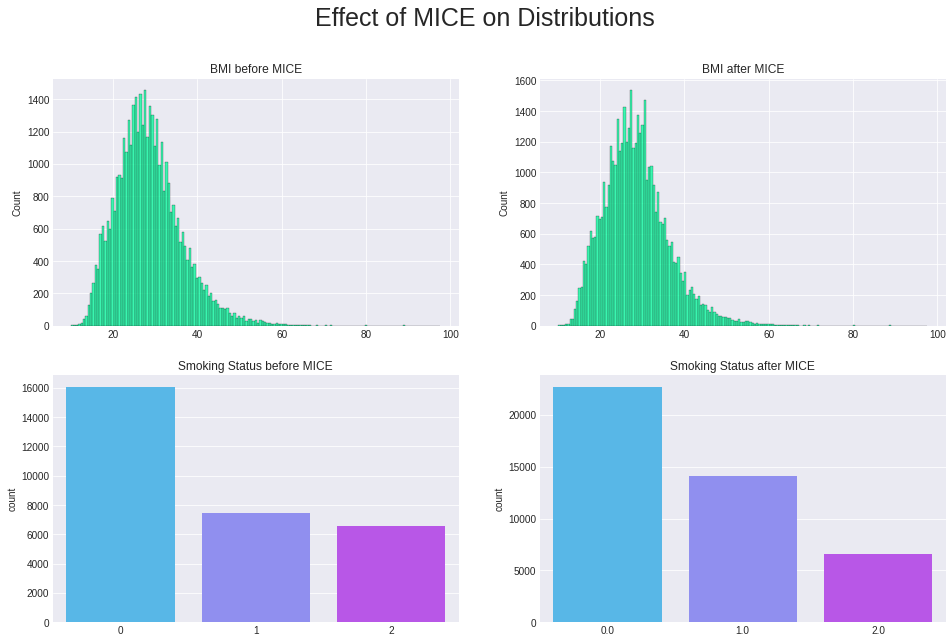

In [ ]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(16,10))
fig.suptitle("Effect of MICE on Distributions\n",fontsize=25)
sns.histplot(x=data["bmi"],ax=axes[0,0],color="mediumspringgreen")
axes[0,0].set_title("BMI before MICE")
axes[0,0].set_xlabel(None)
sns.histplot(x=impdata["bmi"],ax=axes[0,1],color="mediumspringgreen")
axes[0,1].set_title("BMI after MICE")
axes[0,1].set_xlabel(None)
sns.countplot(x=data["smoking_status"],ax=axes[1,0],palette="cool")
axes[1,0].set_title("Smoking Status before MICE")
axes[1,0].set_xlabel(None)
sns.countplot(x=impdata["smoking_status"],ax=axes[1,1],palette="cool")
axes[1,1].set_title("Smoking Status after MICE")
axes[1,1].set_xlabel(None)
plt.show()

# Baseline Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
rf=RandomForestClassifier(n_jobs=-1,max_depth=7)
x=impdata.drop('stroke',axis=1)
y=impdata["stroke"]

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=2)
rf.fit(xtrain,ytrain)
y_pred_tr=rf.predict(xtrain)
y_pred_ts=rf.predict(xtest)
train_mat=classification_report(ytrain,y_pred_tr)
test_mat=classification_report(ytest,y_pred_ts)
print("Baseline Random Forest Results:")
print("Training Classification_Report:\n{}".format(train_mat))
print("Testing Classification_Report:\n{}".format(test_mat))

Baseline Random Forest Results:
Training Classification_Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     34087
         1.0       1.00      0.00      0.00       624

    accuracy                           0.98     34711
   macro avg       0.99      0.50      0.50     34711
weighted avg       0.98      0.98      0.97     34711

Testing Classification_Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      8519
         1.0       0.00      0.00      0.00       159

    accuracy                           0.98      8678
   macro avg       0.49      0.50      0.50      8678
weighted avg       0.96      0.98      0.97      8678



##### Notes:
The model scored a very low recall and 1 in precision for the stroke class on the training data.  
This shows that the dataset is seriously imbalanced.  
The results on the testing data are even worse: the model is classifying everything as without stroke.  

**What now?**  
**Resampling**  .
But some EDA first.  
Then resampling. Random sampling to be exact.  
Make sure you check it out in part 2 here: 

الحمد لله الذي بنعمته تتم الصالحات